# Query for Spectraction Results in OGA

 work with Weakly_2023_27
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/07/20
- last update : 2023/05/24

- Spectractor https://github.com/lsst/Spectractor/
- Spectractor Version 2.5


Implement

- add exposure info in hdf5 attribute to get azimuth



In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_27/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-6.0.0/eups 	setup


In [2]:
! eups list -s lsst_distrib

   gdf42428520+4e9f6d16c8 	current w_2023_27 setup


In [3]:
import h5py

In [4]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [6]:
from astropy.time import Time
import astropy.units as u

## Config

In [7]:
FLAG_MOUNT_ERRORS= False

### Butler

In [8]:
#repo =  "/sdf/group/rubin/repo/main"
repo = "/sdf/group/rubin/repo/oga/"
#repo = "/repo/embargo/"
butler = dafButler.Butler(repo)
registry = butler.registry

## User collections

In [9]:
DateToRuncollection_rebin2 = {
 # January 2023
 20230117 :  "u/dagoret/BPS_manyspectro_v100", 
 20230118 :  "u/dagoret/BPS_manyspectro_v102", 
 20230119 :  "u/dagoret/BPS_manyspectro_v104",  
 20230131 :  "u/dagoret/BPS_manyspectro_v106",  
    
# Feb 2023
 20230201 :  "u/dagoret/BPS_manyspectro_v108", 
 20230202 :  "u/dagoret/BPS_manyspectro_v110", 
 20230214 :  "u/dagoret/BPS_manyspectro_v112", 
 20230215 :  "u/dagoret/BPS_manyspectro_v114", 
 20230216 :  "u/dagoret/BPS_manyspectro_v116", 
 20230228 :  "u/dagoret/BPS_manyspectro_v118",  
    
# March 2023    
 20230301 :  "u/dagoret/BPS_manyspectro_v120", 
 20230302 :  "u/dagoret/BPS_manyspectro_v122",
 20230315 :  "u/dagoret/BPS_manyspectro_v124", 
 20230316 :  "u/dagoret/BPS_manyspectro_v126",  
    
    
# May 2023
20230509 :  "u/dagoret/BPS_manyspectro_v128", 
20230510 :  "u/dagoret/BPS_manyspectro_v130",
20230511 :  "u/dagoret/BPS_manyspectro_v132",     
    
    
 # July 2023
 20230718 :  "u/dagoret/BPS_manyspectro_v96", 
 20230720 :  "u/dagoret/BPS_manyspectro_v98",
}
DateToRuncollection_rebin1 = {
 # January 2023
 20230117 :  "u/dagoret/BPS_manyspectro_v101", 
 20230118 :  "u/dagoret/BPS_manyspectro_v103",  
 20230119 :  "u/dagoret/BPS_manyspectro_v105",  
 20230131:  "u/dagoret/BPS_manyspectro_v107",  
    
# February    
 20230201:  "u/dagoret/BPS_manyspectro_v109",  
 20230202:  "u/dagoret/BPS_manyspectro_v111",  
    
 20230214 :  "u/dagoret/BPS_manyspectro_v113", 
 20230215 :  "u/dagoret/BPS_manyspectro_v115", 
 20230216 :  "u/dagoret/BPS_manyspectro_v117", 
 20230228 :  "u/dagoret/BPS_manyspectro_v119",  
    
    
# March 2023    
 20230301 :  "u/dagoret/BPS_manyspectro_v121", 
 20230302 :  "u/dagoret/BPS_manyspectro_v123",
 20230315 :  "u/dagoret/BPS_manyspectro_v125", 
 20230316 :  "u/dagoret/BPS_manyspectro_v127",  
    
    
# May 2023
20230509 :  "u/dagoret/BPS_manyspectro_v129", 
20230510 :  "u/dagoret/BPS_manyspectro_v131",
20230511 :  "u/dagoret/BPS_manyspectro_v133",     
    
    
 # July 2023
 20230718 :  "u/dagoret/BPS_manyspectro_v97", 
 20230720 :  "u/dagoret/BPS_manyspectro_v99", 
}

## Working mode

### Rebin mode

- make your choice

In [10]:
MODE_REBIN = 2

### Date

In [11]:
DATE = 20230511

if MODE_REBIN == 2:
    my_collection = DateToRuncollection_rebin2[DATE]
else:
    my_collection = DateToRuncollection_rebin1[DATE]

filterdispersername = "empty~holo4_003"


# List of Dataset types avalaible in my collection

## List of dataset types

In [12]:
list(registry.queryDatasetTypes("*spec*"))

[DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict),
 DatasetType('spectraction', {band, instrument, detector, physical_filter, visit}, Spectraction),
 DatasetType('spectractorImage', {band, instrument, detector, physical_filter, visit}, SpectractorImage),
 DatasetType('spectractorSpectrum', {band, instrument, detector, physical_filter, visit}, SpectractorSpectrum),
 DatasetType('spectrogramLibradtranFitParameters', {band, instrument, detector, physical_filter, visit}, SpectractorFitParameters),
 DatasetType('spectrumForwardModelFitParameters', {band, instrument, detector, physical_filter, visit}, SpectractorFitParameters),
 DatasetType('spectrumLibradtranFitParameters', {band, instrument, detector, physical_filter, visit}, SpectractorFitParameters)]

## list of datasets

In [13]:
list(registry.queryDatasets("*spec*", collections=[my_collection]))[:10]

[DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023051100175, ...}, run='u/dagoret/BPS_manyspectro_v132/20230724T134752Z', id=5af34f7f-9ff8-476f-870b-f508dc12347d),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023051100211, ...}, run='u/dagoret/BPS_manyspectro_v132/20230724T134752Z', id=6d6fa69b-f446-4571-84a0-725959fe3469),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2023051100252, ...}, run='u/dagoret/BPS_manyspectro_v132/20230724T134752Z', id=1f1b9f9b-8279-459e-9419-f274fdda7b27),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit

In [14]:
print(butler.registry.dimensions["exposure"].RecordClass.fields)

exposure: 
  instrument: str
  id: int
  physical_filter: str
  obs_id: str
  exposure_time: float
  dark_time: float
  observation_type: str
  observation_reason: str
  day_obs: int
  seq_num: int
  seq_start: int
  seq_end: int
  group_name: str
  group_id: int
  target_name: str
  science_program: str
  tracking_ra: float
  tracking_dec: float
  sky_angle: float
  azimuth: float
  zenith_angle: float
  has_simulated: bool
  timespan: lsst.daf.butler.Timespan


In [15]:
where_clause = f"instrument=\'LATISS\' AND exposure.day_obs={DATE} AND exposure.science_program=\'spec\'"

In [16]:
where_clause

"instrument='LATISS' AND exposure.day_obs=20230511 AND exposure.science_program='spec'"

In [17]:
results_exposures = registry.queryDimensionRecords('exposure',datasets="raw",collections = 'LATISS/raw/all',where=where_clause)

In [18]:
#results_exposures = registry.queryDimensionRecords('exposure',datasets="raw",collections = 'LATISS/raw/all',where= "instrument='LATISS' AND exposure.day_obs=20230718 AND exposure.science_program='spec'")

In [19]:
list_exposures_attrib = list(results_exposures)
dict_exposure = {}
for element in list_exposures_attrib:
    element_id = element.id
    #print(f'--------- {element_id} -------')
    #print(element.toDict())
    dict_exposure[element_id] = element

In [20]:
#dict_exposure

### Spectractor

In [21]:
if MODE_REBIN == 2:
    configmode = "PSF2DFFM_REBIN2"
else:
    configmode = "PSF2DFFM_REBIN1"

specver="specV2.5"

https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

In [22]:
#summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-oga.csv"
summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
output_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

### The collection

In [23]:
datasetRefs = registry.queryDatasets(datasetType='spectractorSpectrum', collections=my_collection, where= "instrument='LATISS'")

In [24]:
# following line not possible in OGA
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

In [25]:
if FLAG_MOUNT_ERRORS:
    df_mounterrors = pd.read_csv("mountErrors.csv")
    df=df_mounterrors[df_mounterrors["date_obs"] == DATE ]
    if len(df) == 0:
        FLAG_MOUNT_ERRORS = False
        

## Loop on exposures

In [26]:
#outfile.close()

In [27]:
all_dataId = []     # full data id
all_spec = []       # spectra
all_exposures = []  # exposure number
all_num = []        # sequence numbers
all_h5group = []

hf_outfile =  h5py.File(output_file_h5, 'w') 
  

for i, ref in enumerate(datasetRefs):

    print(f"============= ({i}) ============datasetType = spectraction ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    
    #through old runs
    date_of_run = int(ref.run.split("/")[-1].split("T")[0])
    
 
    
    
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    
    
    #print(dict_exposure[the_exposure])
    
    the_exposure_key = str(the_exposure)
    
    if the_exposure not in all_exposures:
        g = hf_outfile.create_group(the_exposure_key)
        all_h5group.append(g) 
    else:
        print(f">>>>>>  already existing key {the_exposure_key} Skip it !!! ")
        the_exposure_key = the_exposure_key + "_b"
        continue
   
    
    # retrieve the spectrum from Butler
    #spec       = butler.get('spectraction',the_dataId)
    spec = butler.get('spectractorSpectrum', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    # save in collection lists
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_spec.append(spec)
    all_num.append(the_seq_num)
    

============= (0) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023051100228}
visit...................: 2023051100228
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v132/20230724T134752Z
{'day_obs': 20230511, 'seq_num': 228, 'detector': 0}
============= (1) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2023051100184}
visit...................: 2023051100184
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v132/20230724T134752Z
{'day_obs': 20230511, 'seq_num': 184, 'detector': 0}
============= (2) ============datasetType = 

In [28]:
hf_outfile.keys()

<KeysViewHDF5 ['2023051100138', '2023051100155', '2023051100160', '2023051100163', '2023051100167', '2023051100172', '2023051100175', '2023051100179', '2023051100184', '2023051100187', '2023051100191', '2023051100196', '2023051100199', '2023051100203', '2023051100208', '2023051100211', '2023051100215', '2023051100220', '2023051100223', '2023051100228', '2023051100233', '2023051100236', '2023051100240', '2023051100245', '2023051100248', '2023051100252', '2023051100257', '2023051100260']>

In [29]:
index = 0

spec = all_spec[index]

In [30]:
the_h5group = all_h5group[index] 

In [31]:
d = the_h5group.create_dataset('airmass', data=spec.airmass)

In [32]:
spec.airmass

2.1046197362597

In [33]:
spec.date_obs

'2023-05-12T00:40:22.965507207Z'

In [34]:
spec.cov_matrix.shape

(1136, 1136)

In [35]:
spec.lambdas.shape

(1136,)

In [36]:
spec.data_next_order.shape

(1136,)

In [37]:
#spec.chromatic_psf.load_table()
spec.chromatic_psf.table

<Table length=1136>
     lambdas               Dx         ...       alpha            saturation    
     float64            float64       ...      float64            float64      
------------------ ------------------ ... ------------------ ------------------
296.23927116126686 418.29825856063985 ...  3.462349584692581 22666.666666666686
 296.9582331623073 419.29825856063985 ...  3.465198164100286 22666.666666666686
 297.6771050313799 420.29825856063985 ...  3.468037759430756 22666.666666666686
298.39588772132277 421.29825856063985 ...  3.470868370683991 22666.666666666686
299.11458216893965 422.29825856063985 ... 3.4736899978599913 22666.666666666686
 299.8331892957975 423.29825856063985 ... 3.4765026409587563 22666.666666666686
300.55171000818063 424.29825856063985 ...  3.479306299980287 22666.666666666686
301.27014519748235 425.29825856063985 ...  3.482100974924583 22666.666666666686
 301.9884957406746 426.29825856063985 ... 3.4848866657916435 22666.666666666686
 302.7067625004332 427.29825856063985 ...  3.487663372581469 22666.666666666686
               ...                ... ...                ...                ...
 1085.080214169298 1544.2982585606399 ...                1.1 22666.666666666686
1085.7642563289019 1545.2982585606399 ...                1.1 22666.666666666686
1086.4482631720514 1546.2982585606399 ...                1.1 22666.666666666686
 1087.132234679709 1547.2982585606399 ...                1.1 22666.666666666686
 1087.816170832783 1548.2982585606399 ...                1.1 22666.666666666686
 1088.500071612231 1549.2982585606399 ...                1.1 22666.666666666686
 1089.183936999047 1550.2982585606399 ...                1.1 22666.666666666686
1089.8677669743201 1551.2982585606399 ...                1.1 22666.666666666686
1090.5515615188299 1552.2982585606399 ...                1.1 22666.666666666686
1091.2353206137066 1553.2982585606399 ...                1.1 22666.666666666686

In [38]:
spec.spectrogram_saturation

22666.66666666667

In [39]:
spec.chromatic_psf.plot_summary()

In [40]:
def DumpSpectrum(spec):
    print("--------------------------------------------")
    print("spec.target.label\t",spec.target.label)
    print("spec.filter_label\t",spec.filter_label)
    print("spec.airmass\t",spec.airmass)
    print("spec.date_obs\t",spec.date_obs)
    print("spec.temperature\t",spec.temperature)
    print("spec.pressure\t",spec.pressure)
    print("spec.humidity\t",spec.humidity)    
    #print("spec.ra\t",spec.ra)
    print("spec.dec\t",spec.dec)
    print("spec.hour_angle\t",spec.hour_angle)
    print("spec.parallactic_angle\t",spec.parallactic_angle)
    print("spec.camera_angle\t", spec.camera_angle)
    print("--------------------------------------------")
    print("spec.order\t",spec.order)
    print("spec.lambdas\t",spec.lambdas)
    print("spec.data\t",spec.data)
    print("spec.err\t",spec.err)
    print("spec.covmatrix\t",spec.cov_matrix)
    print("--------------------------------------------")
    print("spec.data_next_order\t",spec.data_next_order)
    print("spec.err_next_order\t",spec.err_next_order)

In [41]:
def AddDataSetsInGroup(spec,h5group):
  
    #spectrum

    h5group.attrs['spec_target_label'] = spec.target.label
    h5group.attrs['spec_filter_label'] = spec.filter_label
    h5group.attrs["spec_date_obs"] = spec.date_obs
    h5group.attrs["spec_airmass"] = spec.airmass 
    h5group.attrs["spec_temperature"] = spec.temperature
    h5group.attrs["spec_pressure"] = spec.pressure
    h5group.attrs["spec_humidity"] = spec.humidity
    h5group.attrs["spec_dec"] = spec.dec
    h5group.attrs["spec_hour_angle"] = spec.hour_angle
    h5group.attrs["spec_parallactic_angle"] = spec.parallactic_angle
    h5group.attrs["spec_camera_angle"] = spec.camera_angle
    h5group.attrs["spec_order"] = spec.order
    
    
    d = h5group.create_dataset("spec_lambdas",data=spec.lambdas,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_data",data=spec.data,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_err",data=spec.err,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_covmatrix",data=spec.cov_matrix,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_data_next_order",data=spec.data_next_order,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_err_next_order",data=spec.err_next_order,compression="gzip", compression_opts=9)
    
    # spectrogram
    
    d = h5group.create_dataset("spec_spectrogram",data=spec.spectrogram,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_bgd",data=spec.spectrogram_bgd,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_bgd_rms",data=spec.spectrogram_bgd_rms,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_err",data=spec.spectrogram_err,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_residuals",data=spec.spectrogram_residuals,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_fit",data=spec.spectrogram_fit,compression="gzip", compression_opts=9)
    
    
    h5group.attrs["spec_spectrogram_x0"]=spec.spectrogram_x0
    h5group.attrs["spec_spectrogram_y0"]=spec.spectrogram_y0
    h5group.attrs["spec_spectrogram_xmin"]=spec.spectrogram_xmin
    h5group.attrs["spec_spectrogram_xmax"]=spec.spectrogram_xmax
    h5group.attrs["spec_spectrogram_ymin"]=spec.spectrogram_ymin
    h5group.attrs["spec_spectrogram_ymax"]=spec.spectrogram_ymax
    h5group.attrs["spec_spectrogram_deg"]=spec.spectrogram_deg
    h5group.attrs["spec_spectrogram_saturation"]=spec.spectrogram_saturation      
    h5group.attrs["spec_spectrogram_Nx"]=spec.spectrogram_Nx
    h5group.attrs["spec_spectrogram_Ny"]=spec.spectrogram_Ny
    
    
    # header
    
    h5group.attrs["spec_header_target"]=spec.header["TARGET"]
    h5group.attrs["spec_header_redshift"]=spec.header["REDSHIFT"]
    h5group.attrs['spec_header_grating']=spec.header["GRATING"]
    h5group.attrs["spec_header_rotangle"]=spec.header["ROTANGLE"]
    h5group.attrs["spec_header_d2ccd"]=spec.header["D2CCD"]
    h5group.attrs["spec_header_lshift"]=spec.header["LSHIFT"]
    h5group.attrs["spec_header_parangle"]=spec.header["PARANGLE"]
    h5group.attrs["spec_header_targetx"]=spec.header["TARGETX"]
    h5group.attrs["spec_header_targety"]=spec.header["TARGETY"]
    h5group.attrs["spec_header_lbda_ref"]=spec.header["LBDA_REF"]
    h5group.attrs["spec_header_pixshift"]=spec.header["PIXSHIFT"]
    h5group.attrs["spec_header_psf_reg"]=spec.header["PSF_REG"]
    h5group.attrs["spec_header_trace_r"]=spec.header["TRACE_R"]   
    h5group.attrs["spec_header_chi2_fit"]=spec.header["CHI2_FIT"]   
    h5group.attrs["spec_header_a2_fit"]=spec.header["A2_FIT"]
    h5group.attrs["spec_header_am_fit"]=spec.header["AM_FIT"]
    h5group.attrs["spec_header_meanfwhm"]=spec.header["MEANFWHM"]
    h5group.attrs["spec_header_version"]=spec.header["VERSION"]
    h5group.attrs["spec_header_rebin"]=spec.header["REBIN"]
    h5group.attrs['spec_header_date-obs']=spec.header["DATE-OBS"]
    h5group.attrs["spec_header_exptime"]=spec.header["EXPTIME"]
    h5group.attrs["spec_header_airmass"]=spec.header["AIRMASS"] 
    h5group.attrs["spec_header_dec"]=spec.header["DEC"]
    h5group.attrs["spec_header_ha"]=spec.header["HA"]
    h5group.attrs["spec_header_outtemp"]=spec.header["OUTTEMP"] 
    h5group.attrs["spec_header_outpress"]=spec.header["OUTPRESS"] 
    h5group.attrs["spec_header_outhum"]=spec.header["OUTHUM"]
    h5group.attrs["spec_header_filter"]=spec.header["FILTER"]
    h5group.attrs["spec_header_cam_rot"]=spec.header["CAM_ROT"] 
    h5group.attrs["spec_header_s_x0"]=spec.header["S_X0"]
    h5group.attrs["spec_header_s_y0"]=spec.header["S_Y0"]
    h5group.attrs["spec_header_s_xmin"]=spec.header["S_XMIN"]      
    h5group.attrs["spec_header_s_xmax"]=spec.header["S_XMAX"]                                               
    h5group.attrs["spec_header_s_ymin"]=spec.header["S_YMIN"]      
    h5group.attrs["spec_header_s_ymax"]=spec.header["S_YMAX"]                                                                                                                  
    h5group.attrs["spec_header_s_nx"]=spec.header["S_NX"]
    h5group.attrs["spec_header_s_ny"]=spec.header["S_NY"]   
    h5group.attrs["spec_header_s_dec"]=spec.header["S_DEG"]  
    h5group.attrs["spec_header_s_sat"]=spec.header["S_SAT"]      
                                               
    

In [42]:
def AddMountErrorsInGroup(h5group,az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms):
    h5group.attrs["me_az_rms"]=az_rms
    h5group.attrs["me_el_rms"]=el_rms
    h5group.attrs["me_rot_rms"]=rot_rms
    h5group.attrs["me_image_az_rms"]=image_az_rms
    h5group.attrs["me_image_el_rms"]=image_el_rms
    h5group.attrs["me_image_rot_rms"]=image_rot_rms
        

In [43]:
def AddExposureInfoInGroup(expoinfo,h5group):
    """
    Add the following informations to hdf5
    {'instrument': 'LATISS', 
     'id': 2023072000256, 
     'physical_filter': 'empty~holo4_003', 
     'obs_id': 'AT_O_20230720_000256', 
     'exposure_time': 30.0, 
     'dark_time': 30.2367, 
     'observation_type': 'science', 
     'observation_reason': 'generic', 
     'day_obs': 20230720, 
     'seq_num': 256, 
     'seq_start': 256, 
     'seq_end': 256, 
     'group_name': '2023-07-21T02:37:11.700', 
     'group_id': 2698366317000000, 
     'target_name': 'HD185975', 
     'science_program': 'spec', 
     'tracking_ra': 307.76950795132393, 
     'tracking_dec': -87.4337852028312, 
     'sky_angle': 42.62309278535102, 
     'azimuth': 177.85543058634352, 
     'zenith_angle': 57.826045218956686, 
     'has_simulated': False, 
     'timespan': Timespan(begin=astropy.time.Time('2023-07-21 02:37:47.189004', scale='tai', format='iso'), end=astropy.time.Time('2023-07-21 02:38:17.426000', scale='tai', format='iso'))
     }
    """
    h5group.attrs["expo_instrument"] = expoinfo.instrument
    h5group.attrs["expo_id"] = expoinfo.id
    h5group.attrs["physical_filter"] = expoinfo.physical_filter
    h5group.attrs["obs_id"] = expoinfo.obs_id
    h5group.attrs["exposure_time"] = expoinfo.exposure_time
    h5group.attrs["dark_time"] = expoinfo.dark_time
    h5group.attrs["observation_type"] = expoinfo.observation_type
    h5group.attrs["observation_reason"] = expoinfo.observation_reason
    h5group.attrs["day_obs"] = expoinfo.day_obs    
    h5group.attrs["seq_num"] = expoinfo.seq_num
    h5group.attrs["group_name"] = expoinfo.group_name
    h5group.attrs["group_id"] = expoinfo.group_id
    h5group.attrs["target_name"] = expoinfo.target_name
    h5group.attrs["science_program"] = expoinfo.science_program
    h5group.attrs["tracking_ra"] = expoinfo.tracking_ra
    h5group.attrs["tracking_dec"] = expoinfo.tracking_dec
    h5group.attrs["sky_angle"] = expoinfo.sky_angle
    h5group.attrs["azimuth"] = expoinfo.azimuth
    h5group.attrs["zenith_angle"] = expoinfo.zenith_angle
    h5group.attrs["mjd"] = Time(expoinfo.timespan.begin.to_string()).mjd
    h5group.attrs["jd"] = Time(expoinfo.timespan.begin.to_string()).jd

    
   

In [44]:
def AddDataSetsInGroupAndIndexExposure(spec,h5group,index,exposure,expoinfo):

    h5group.attrs["index"]=index
    h5group.attrs["exposure"]=exposure
    
    AddDataSetsInGroup(spec,h5group)
    AddExposureInfoInGroup(expoinfo,h5group)

In [45]:
DumpSpectrum(spec)

--------------------------------------------
spec.target.label	 HD185975
spec.filter_label	 empty
spec.airmass	 2.1046197362597
spec.date_obs	 2023-05-12T00:40:22.965507207Z
spec.temperature	 0
spec.pressure	 0
spec.humidity	 0
spec.dec	 -87.4454580772205
spec.hour_angle	 -137.5822083315535
spec.parallactic_angle	 -138.5402476703765
spec.camera_angle	 -30.51634007393699
--------------------------------------------
spec.order	 1
spec.lambdas	 [ 296.12263459  296.84140093  297.5600787  ... 1089.68343659 1090.36719141
 1091.05091079]
spec.data	 [-2.58625307e-14 -1.10045209e-14 -4.53509233e-15 ...  2.75520936e-14
  3.55634234e-14  3.90613337e-14]
spec.err	 [8.20573518e-15 5.61013334e-15 4.39100483e-15 ... 5.44577871e-15
 6.98481488e-15 8.45456102e-15]
spec.covmatrix	 [[ 6.73340899e-29  3.59102610e-29  3.68467726e-30 ... -2.52752368e-39
  -2.86347138e-39 -3.07079915e-39]
 [ 3.59102610e-29  3.14735961e-29  1.15158921e-29 ... -2.63843615e-39
  -2.98837166e-39 -3.20397813e-39]
 [ 3.68467726e-3

# Save all spectra in a single file

In [46]:
exposures_sorted = np.sort(all_exposures)

In [47]:
for idx,spec in enumerate(all_spec):   
    the_exposure = all_exposures[idx]
    the_sorted_index = np.where(exposures_sorted == the_exposure)[0][0]
    
    
    #print(dict_exposure[the_exposure])
    
    # here add in HDF5
    AddDataSetsInGroupAndIndexExposure(spec,all_h5group[idx],the_sorted_index,the_exposure,dict_exposure[the_exposure])
    
    
    if FLAG_MOUNT_ERRORS:
        df_exp_selected = df[df["exposure"] == the_exposure]
        N = len(df_exp_selected)
        if (N)>0:
            az_rms = df_exp_selected["az_rms"].values[0]
            el_rms = df_exp_selected["el_rms"].values[0]
            rot_rms = df_exp_selected["rot_rms"].values[0]
            image_az_rms = df_exp_selected["image_az_rms"].values[0]
            image_el_rms = df_exp_selected["image_el_rms"].values[0]
            image_rot_rms = df_exp_selected["image_rot_rms"].values[0]
            AddMountErrorsInGroup(all_h5group[idx],az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms)
        else:
            print(f"No error mount for exposure {the_exposure}")
            AddMountErrorsInGroup(all_h5group[idx],-1.,-1.,-1.,-1.,-1.,-1.)
            

In [48]:
hf_outfile.keys()

<KeysViewHDF5 ['2023051100138', '2023051100155', '2023051100160', '2023051100163', '2023051100167', '2023051100172', '2023051100175', '2023051100179', '2023051100184', '2023051100187', '2023051100191', '2023051100196', '2023051100199', '2023051100203', '2023051100208', '2023051100211', '2023051100215', '2023051100220', '2023051100223', '2023051100228', '2023051100233', '2023051100236', '2023051100240', '2023051100245', '2023051100248', '2023051100252', '2023051100257', '2023051100260']>

In [49]:
#AddDataSetsInGroup(spec,the_h5group) # already done previously
hf_outfile.close() 

## Plot Spectra

- sequence order

In [50]:
rank = np.argsort(all_exposures)

In [51]:
NSPEC = len(all_exposures)

In [52]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

/tmp/ipykernel_31436/4265044068.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(16,4))


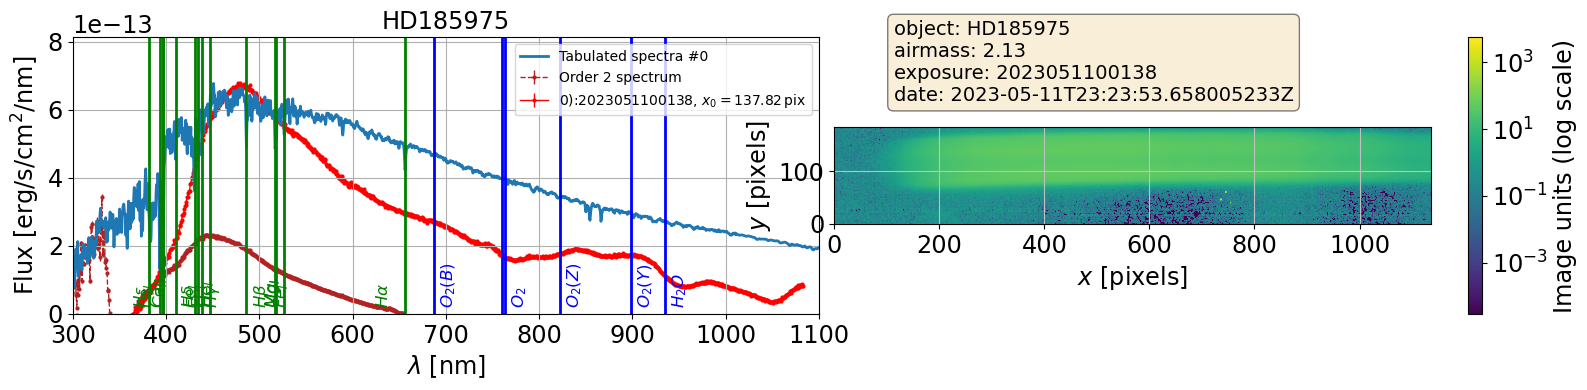

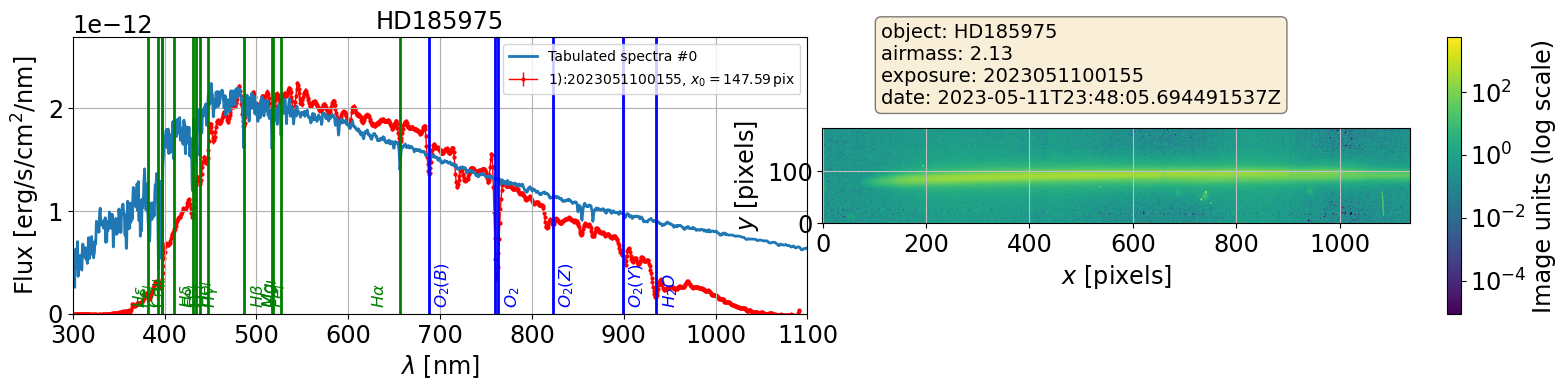

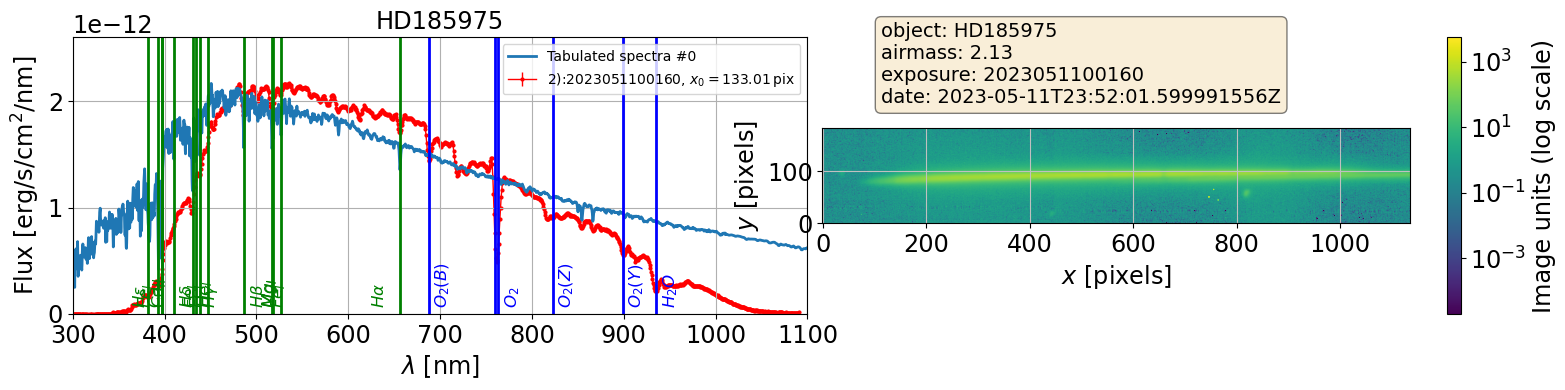

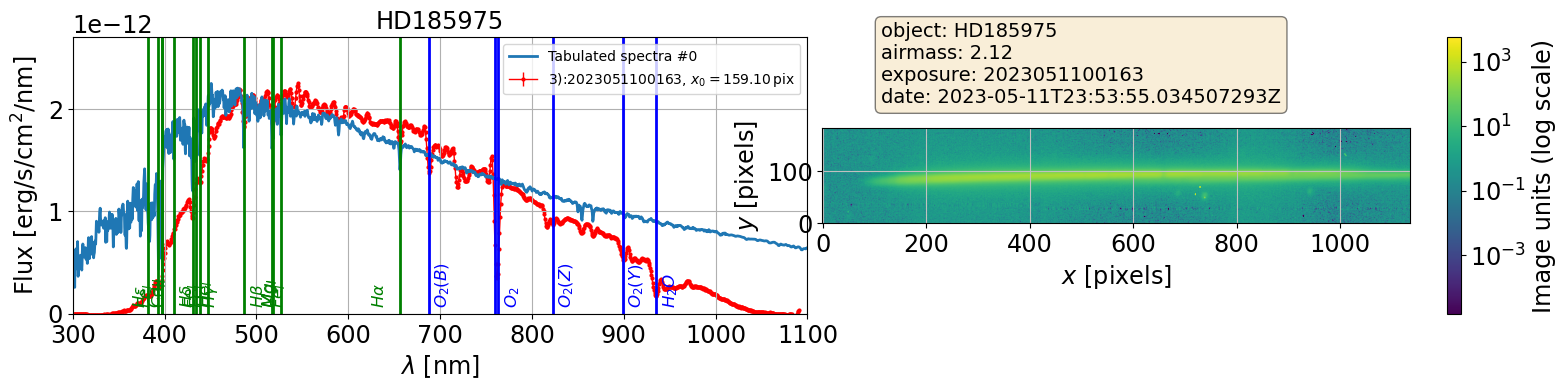

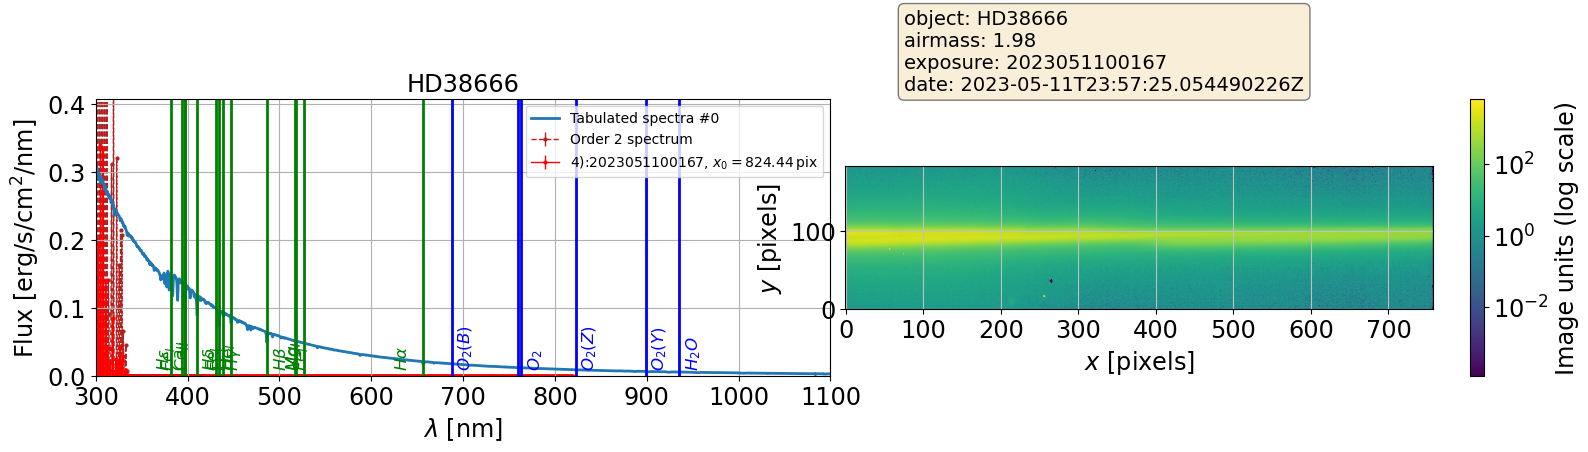

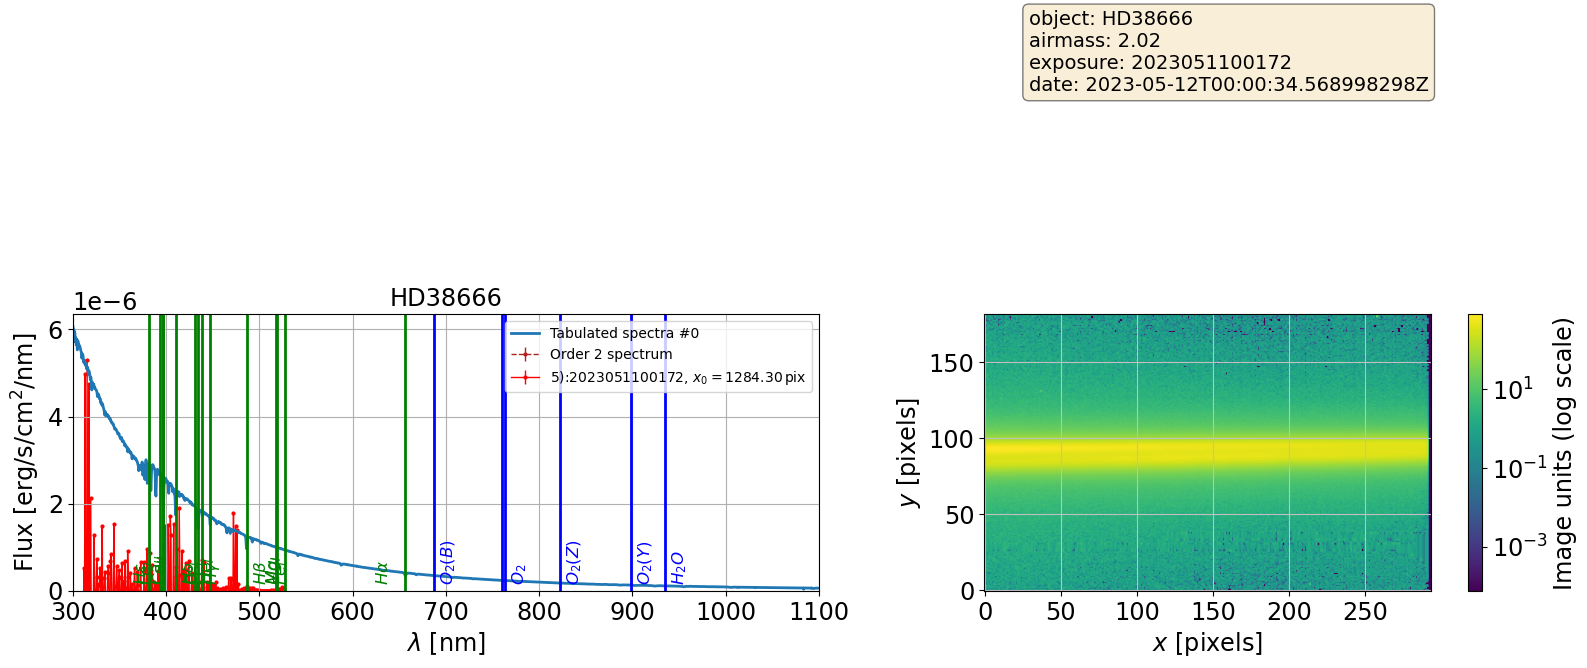

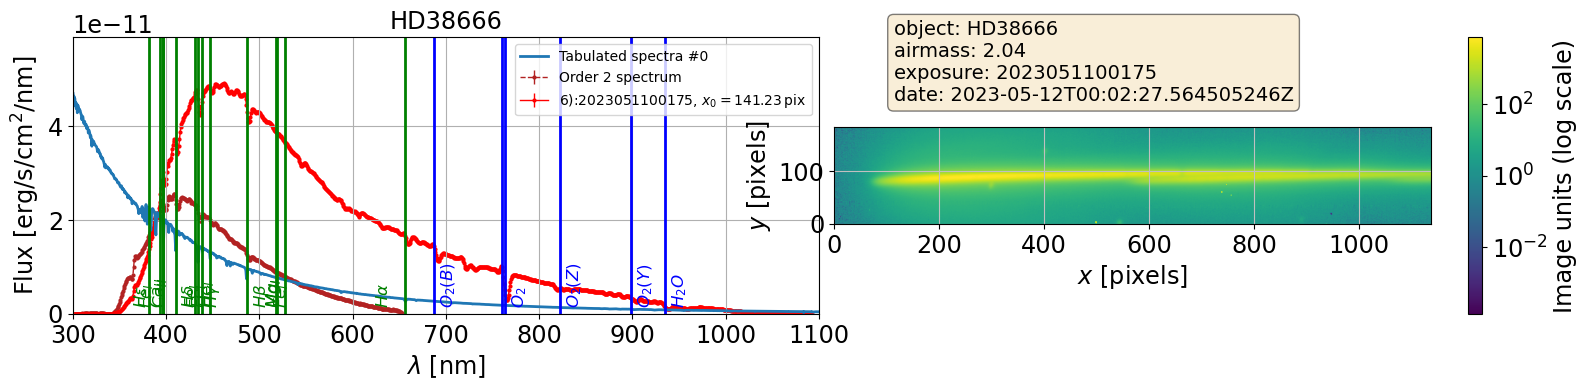

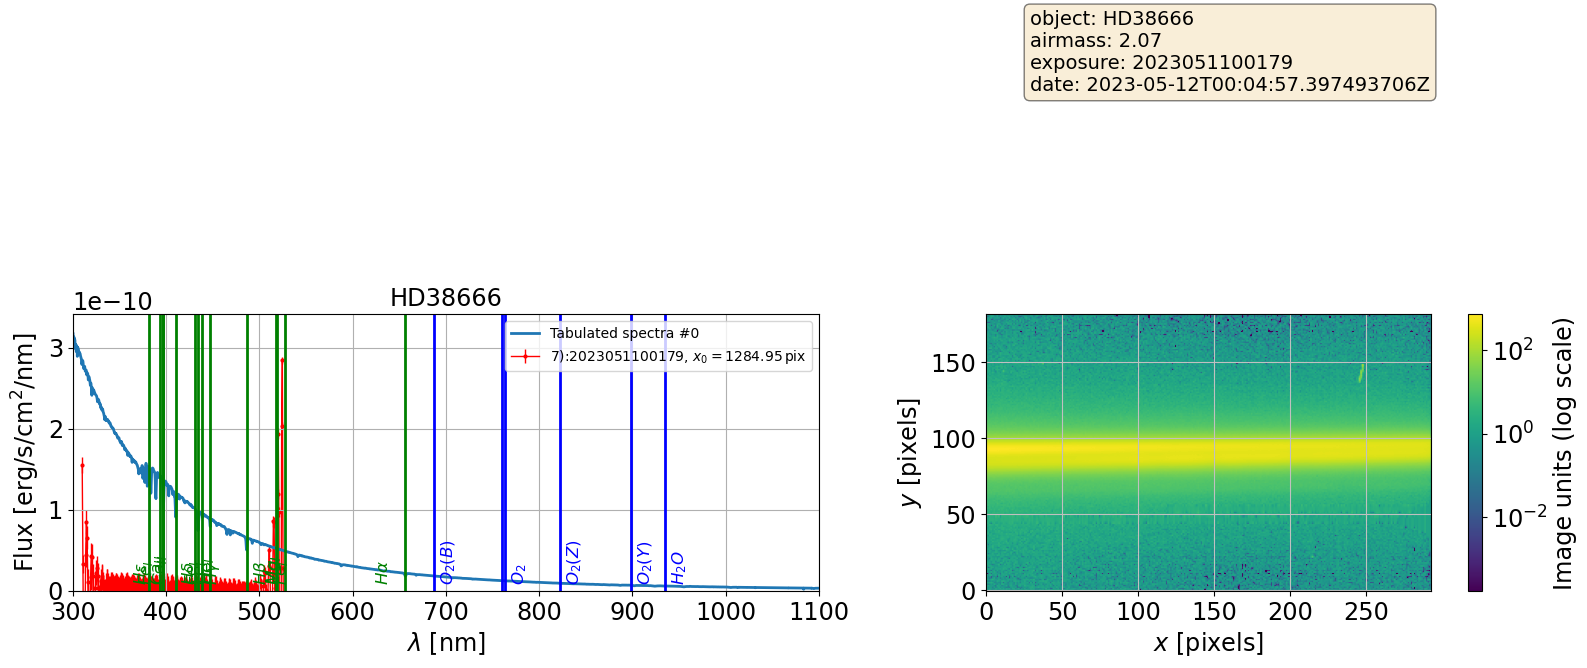

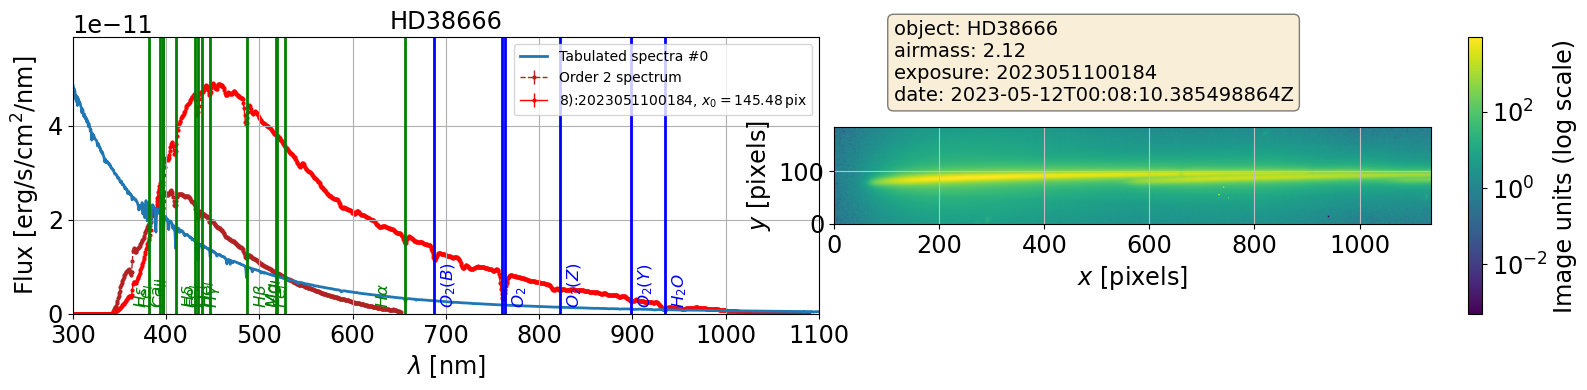

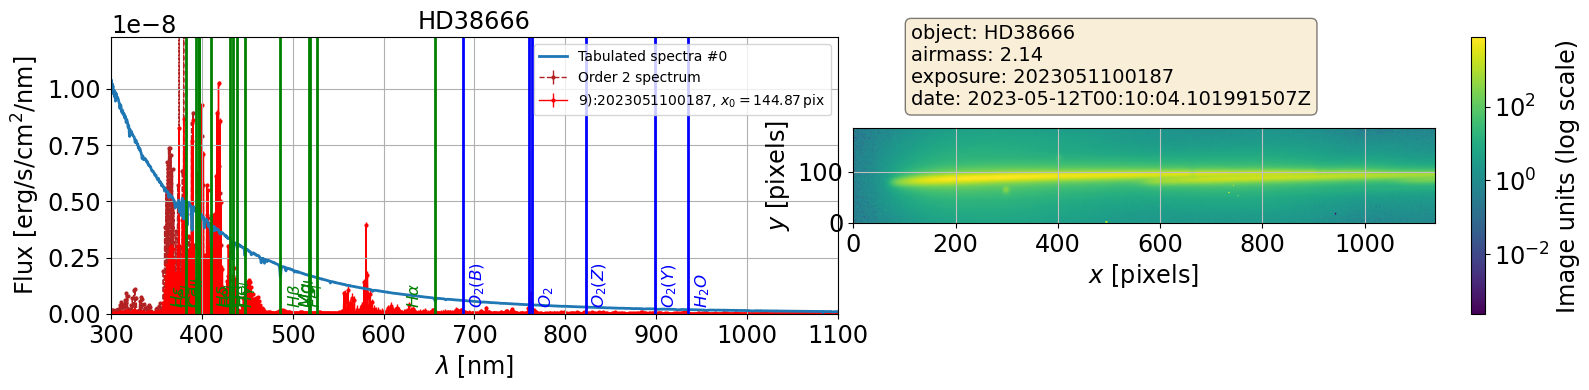

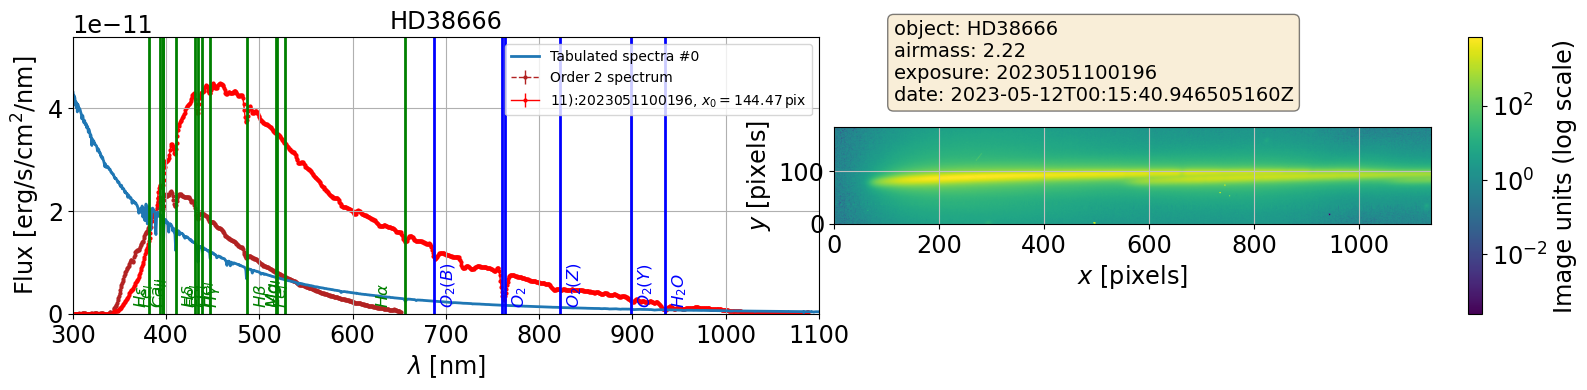

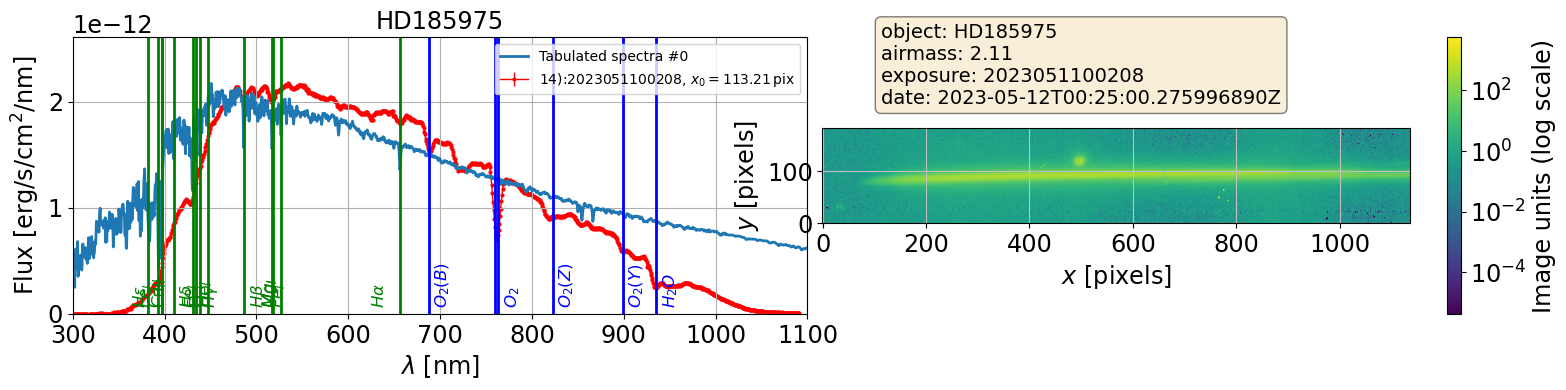

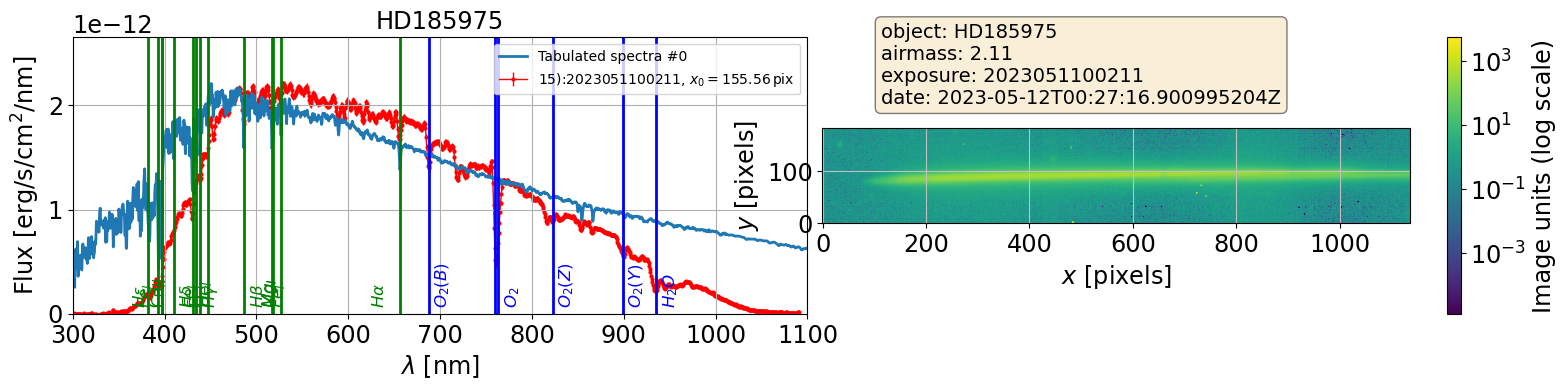

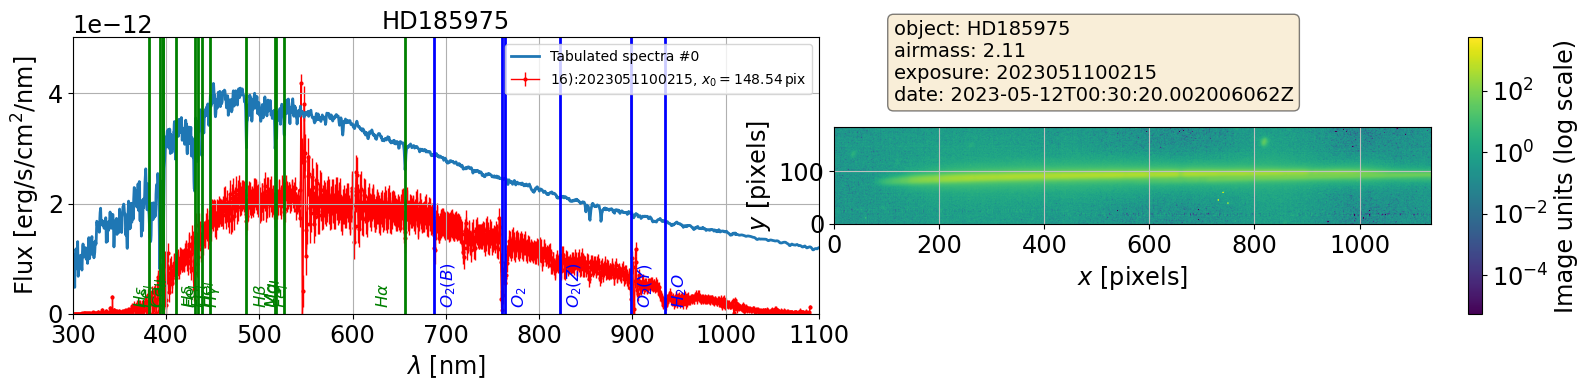

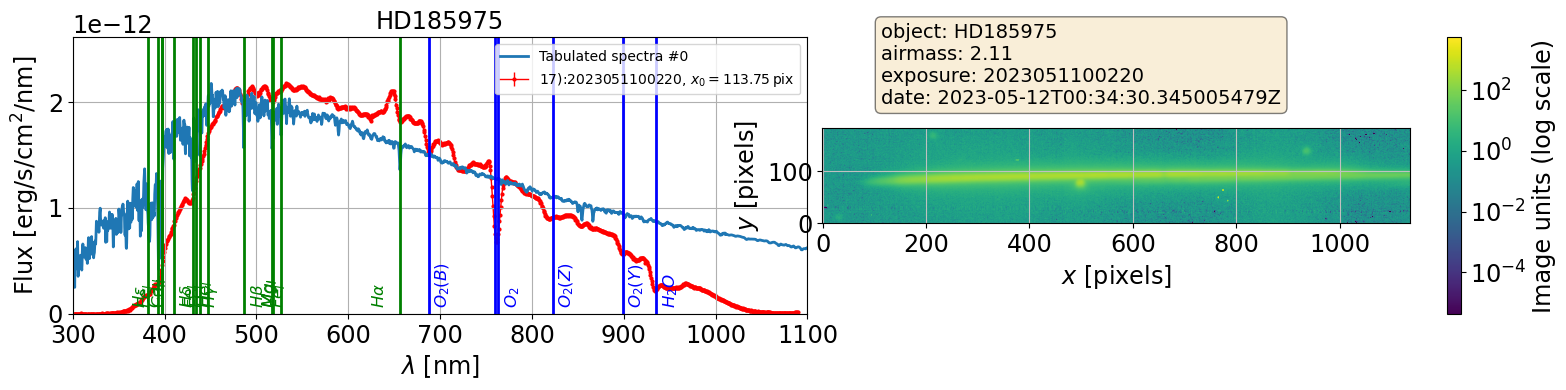

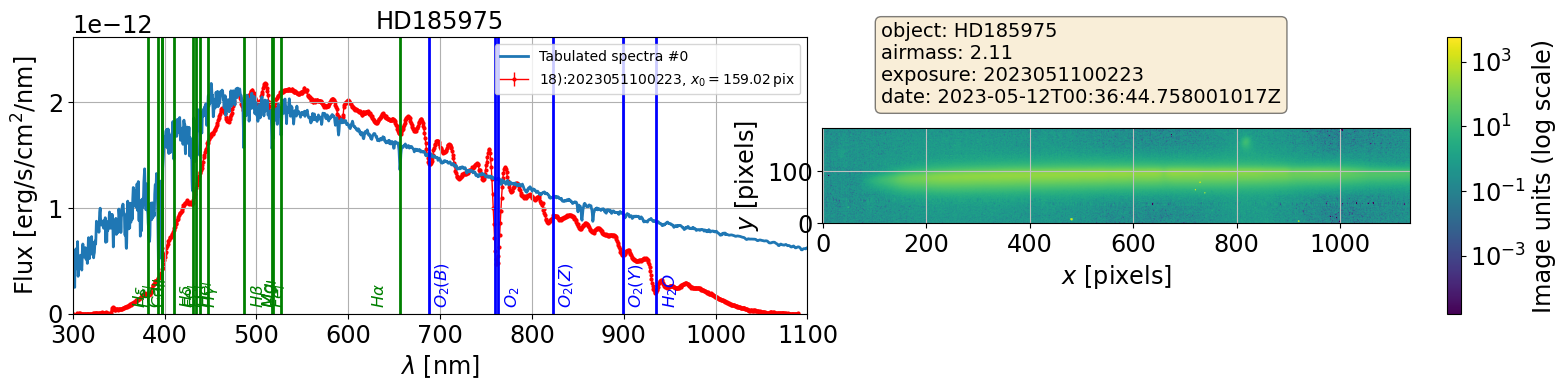

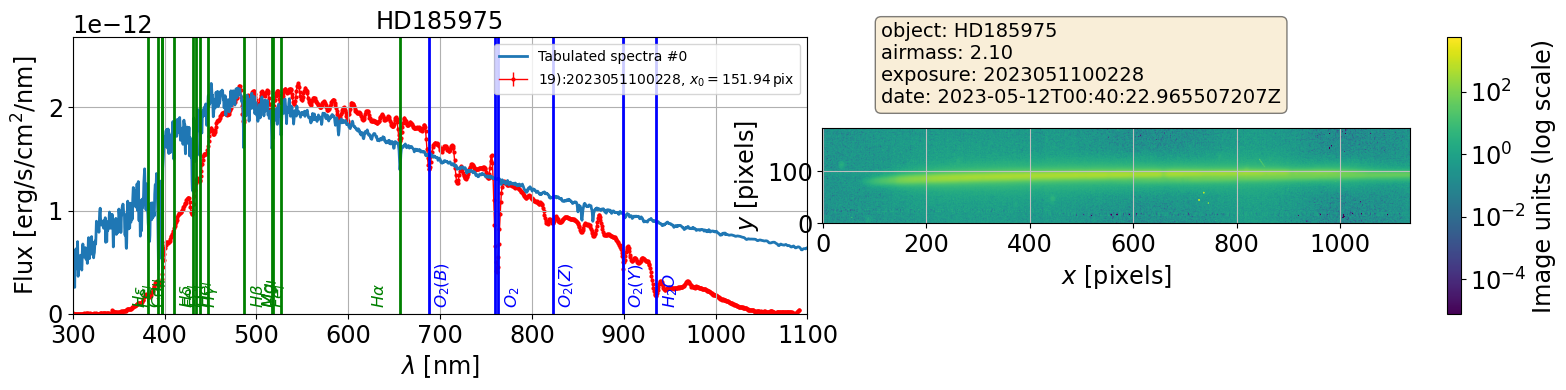

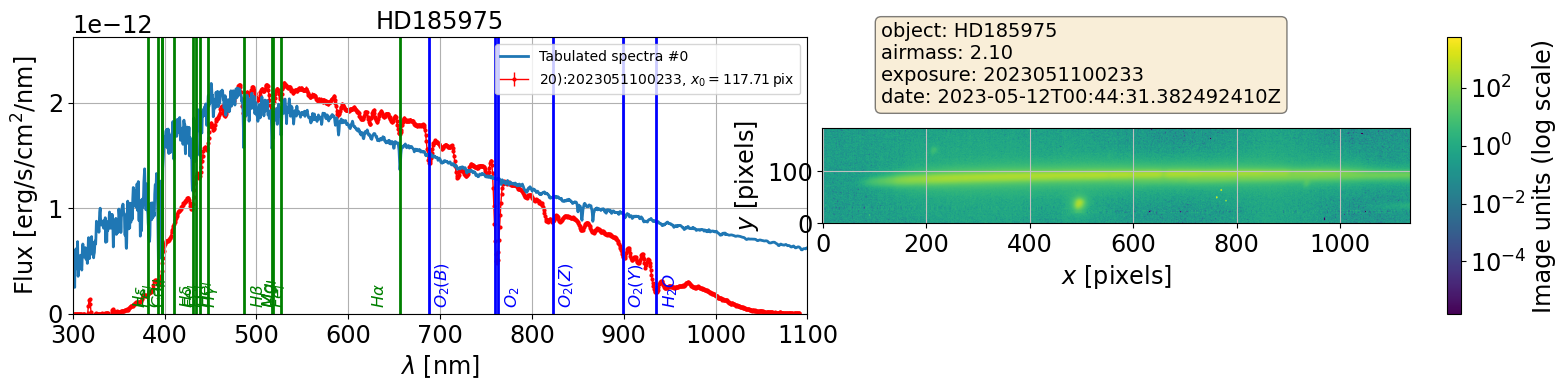

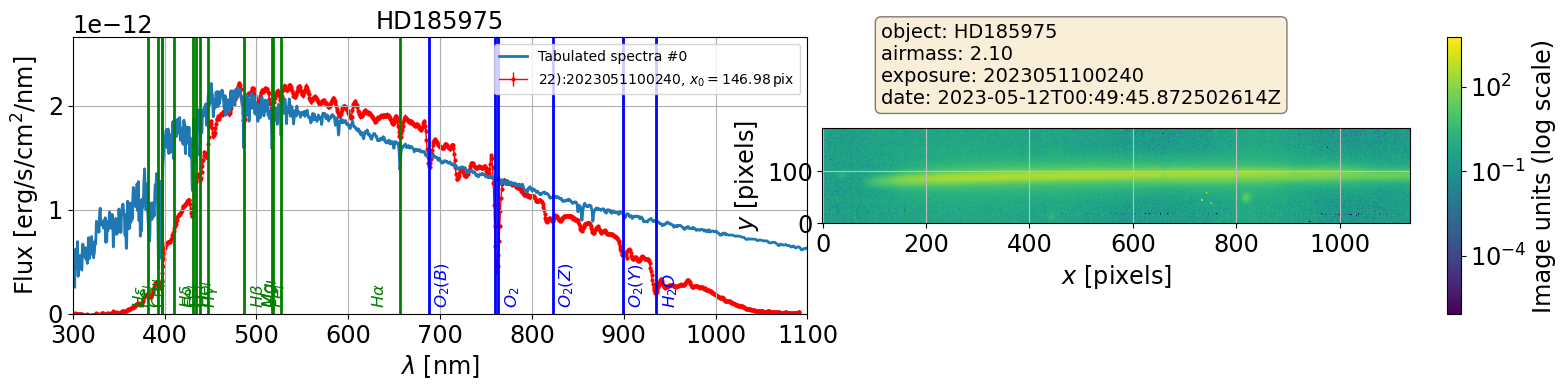

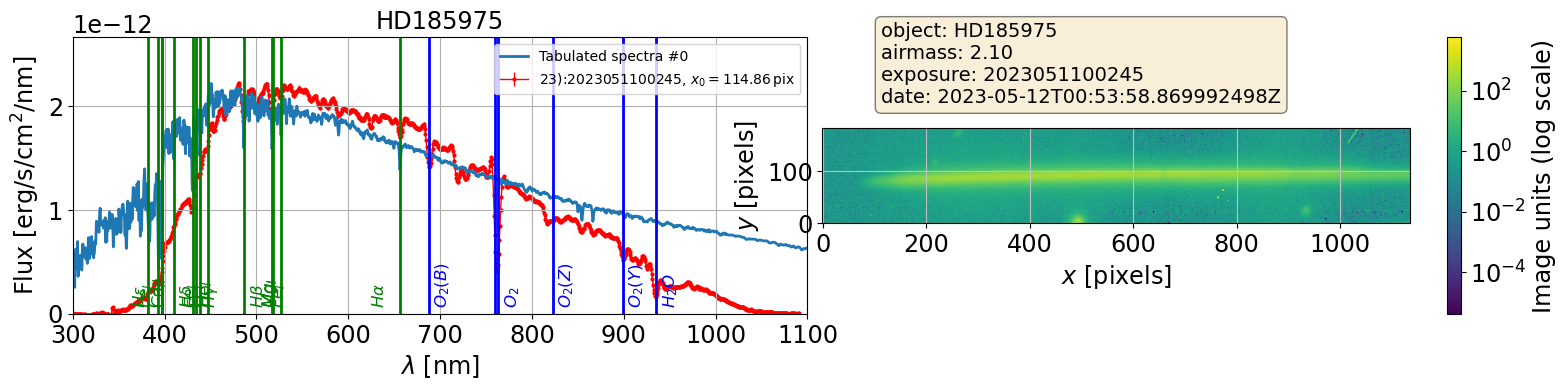

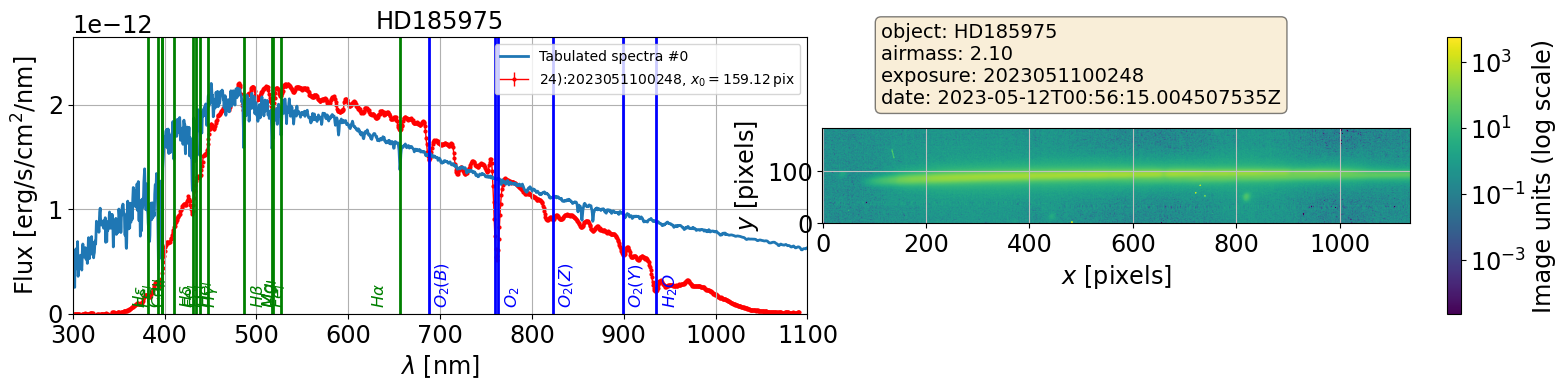

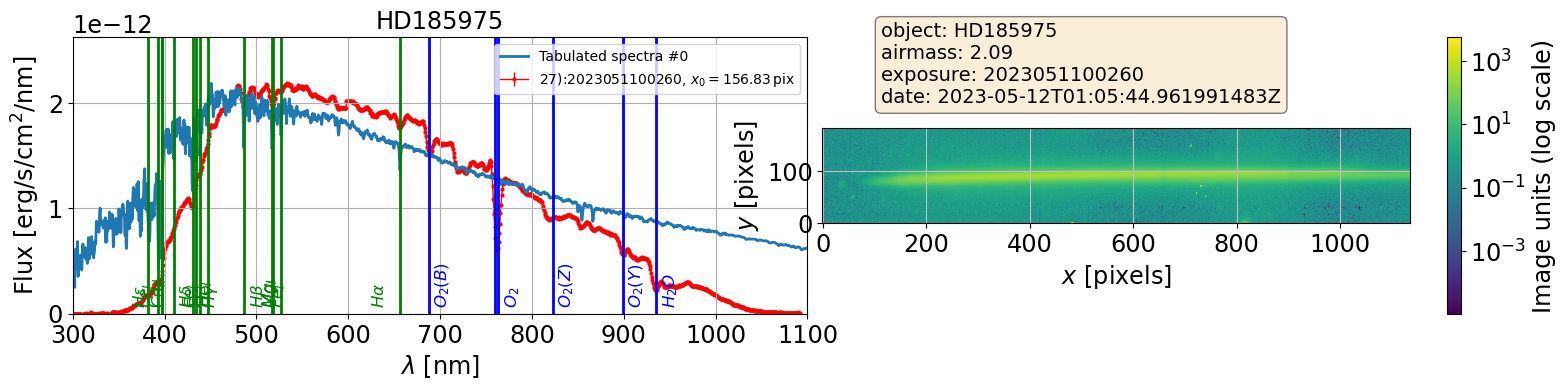

In [53]:
%matplotlib inline

infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]
all_textstr = []



# loop on spectra
for index in range(NSPEC):
    
    idx = rank[index]
    s=all_spec[idx]
    label = str(index) +"):" + str(all_exposures[idx])
    the_expos = all_exposures[idx]
    
    try:
        fig=plt.figure(figsize=(16,4))
        
       
        textstr = '\n'.join((f"object: {s.target.label}", f"airmass: {s.airmass:.2f}",f"exposure: {the_expos}",f"date: {s.date_obs}"))
    
        ax1 = fig.add_subplot(1, 2, 1)
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        ax2 = fig.add_subplot(1, 2, 2)
        s.plot_spectrogram(ax=ax2,scale="log")
        ax2.text(0.1, 2.1, textstr, transform=ax2.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    
        all_lambdas.append(s.lambdas)
        all_data.append(s.data)
        all_data_err.append(s.err)
    
        #save info    
        infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
        all_textstr.append(textstr)
        
        
            
    except Exception as inst:
        print(" >>> Exception catched for "+ label )
        print(type(inst))    # the exception instance
        print(inst.args)     # arguments stored in .args

    
    idx+=1

# Save plot in pdf file

In [54]:
from matplotlib.backends.backend_pdf import PdfPages

In [55]:
def SaveFigSpectraInPdf(nbspecperpage=5):
    
    Nspec= len(all_spec)
    Nbpages = np.ceil(Nspec/nbspecperpage)
    idx_inpage = nbspecperpage
    idx_pagenum = 0
    idx = 0
    
    all_composed_figs = []
    
    # loop on spectra
    for index in range(Nspec):  
        
        # get index on spectrum
        idx = rank[index]
        textstr = all_textstr[index]
   
        # if we need to start a new page
        if idx_inpage == nbspecperpage:
            idx_inpage = 1  # start at the first row in the page from 1 to nbspecperpage
            idx_pagenum += 1  # increase page counter
            
            # this trigger the saving of the whole figure (including all spectra of the page)
            if idx_pagenum > 1:
                plt.show()
                all_composed_figs.append(fig)
            
            # this create a new figure 
            fig=plt.figure(figsize=(16,20))
            
        # this is not a new page, need to increase the row number inside this page from 1 to nbspecperpage    
        else:
            idx_inpage += 1   
        
        # index of the figure in the page
        idx_fig = 2*(idx_inpage-1)+1
        
        print(f"\t \t  SaveFigSpectraInPdf >>>>>>>>  spec num = {index}, pagenum = {idx_pagenum}/{Nbpages}, idx_inpage = {idx_inpage}, idx_fig = {idx_fig}")        
       
    
        # Get the spectrum          
        s=all_spec[idx]
        label = str(index) +"):" + str(all_exposures[idx])
        
        # left image, two columns
        ax1 = fig.add_subplot(nbspecperpage, 2, idx_fig)
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        #right image, to columns
        ax2 = fig.add_subplot(nbspecperpage, 2, idx_fig+1)
        s.plot_spectrogram(ax=ax2,scale="log")
        ax2.text(0.1, 2.1, textstr, transform=ax2.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
        
             
                           
    return  all_composed_figs
    


	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 0, pagenum = 1/6.0, idx_inpage = 1, idx_fig = 1
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 1, pagenum = 1/6.0, idx_inpage = 2, idx_fig = 3
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 2, pagenum = 1/6.0, idx_inpage = 3, idx_fig = 5
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 3, pagenum = 1/6.0, idx_inpage = 4, idx_fig = 7
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 4, pagenum = 1/6.0, idx_inpage = 5, idx_fig = 9


	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 5, pagenum = 2/6.0, idx_inpage = 1, idx_fig = 1
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 6, pagenum = 2/6.0, idx_inpage = 2, idx_fig = 3
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 7, pagenum = 2/6.0, idx_inpage = 3, idx_fig = 5
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 8, pagenum = 2/6.0, idx_inpage = 4, idx_fig = 7
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 9, pagenum = 2/6.0, idx_inpage = 5, idx_fig = 9


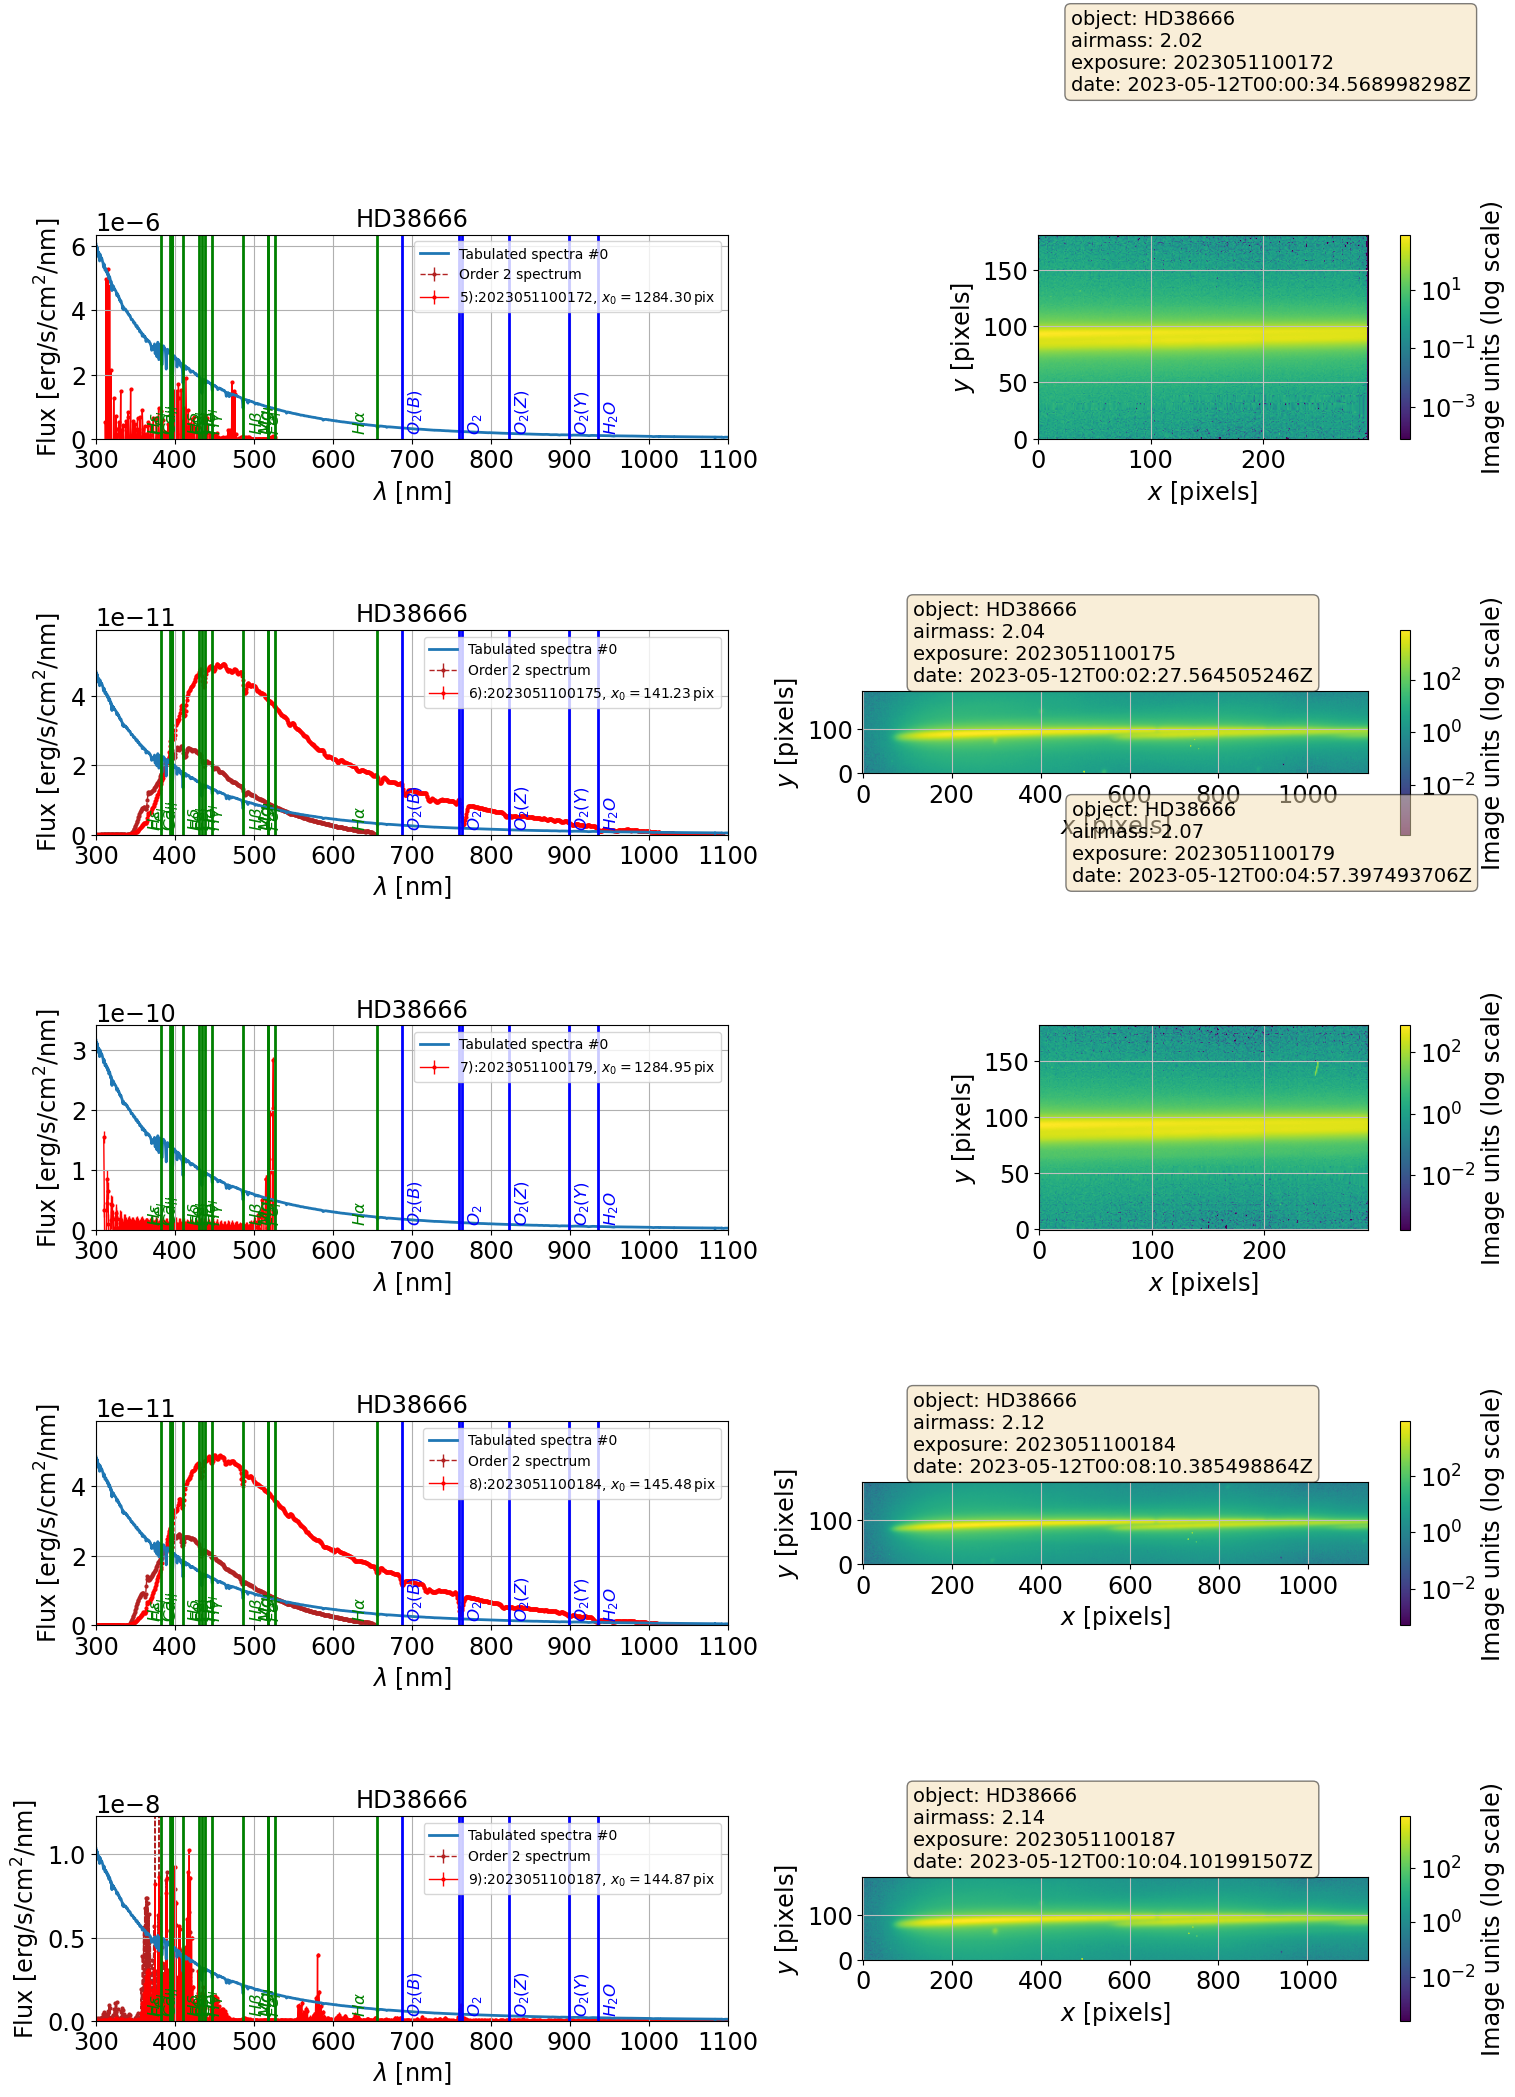

	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 10, pagenum = 3/6.0, idx_inpage = 1, idx_fig = 1
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 11, pagenum = 3/6.0, idx_inpage = 2, idx_fig = 3
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 12, pagenum = 3/6.0, idx_inpage = 3, idx_fig = 5
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 13, pagenum = 3/6.0, idx_inpage = 4, idx_fig = 7
	 	  SaveFigSpectraInPdf >>>>>>>>  spec num = 14, pagenum = 3/6.0, idx_inpage = 5, idx_fig = 9


In [ ]:
all_figs = SaveFigSpectraInPdf(nbspecperpage=5)

In [ ]:
multipage_pdf_file = f'multipage_pdf_spectra_holo_{DATE}-{filterdispersername}-{configmode}-{specver}.pdf'

In [ ]:
# gerate a multipage pdf:
with PdfPages(multipage_pdf_file) as pdf:
    for fig in all_figs:
        pdf.savefig(fig)
        plt.close()